### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Loading the dataset

In [2]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [3]:
y = y['co2'].resample('MS').mean()
y = y.fillna(y.bfill())


In [4]:
print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


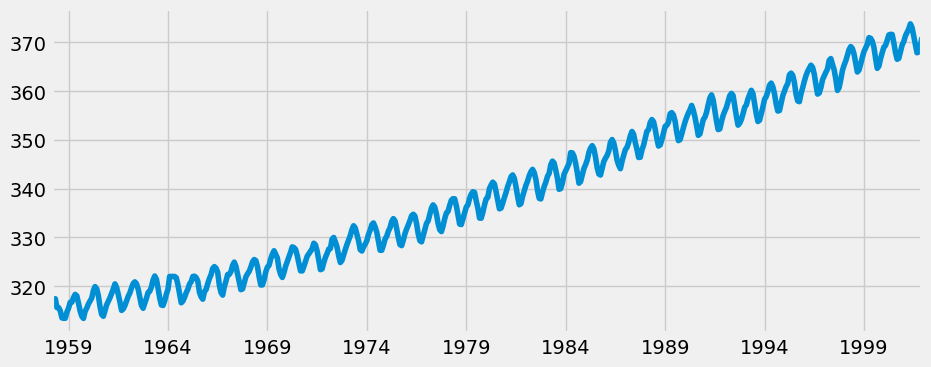

In [5]:
y.plot(figsize=(10, 4))
plt.show()

### Extracting the best parameters and aplying seasonality.

In [6]:
# taking values for p.d and q in a range of 0 to 2
p = d = q = range(0,2)

# Generating all possible combinations. 
pdq = list(itertools.product(p,d,q))

# generating combinations of seasonal triplets
seasonal_pdq = [(x[0], x[1],x[2], 12) for x in list(itertools.product(p,d,q))]

# demonstrating some values
print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### Calculating the AIC scores and finding the least values for it.

In [7]:
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y,
                                              order= param,
                                              seasonal_order=param_seasonal,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            results = model.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624038465
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.8282341411787


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.711172764181
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.938892132007
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878577503577
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.657897807711
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647913001942
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048755649488
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327880197
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941066998224
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716822672
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1092.1982174639388
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:822.3484588988233
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.595789363852
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988427543
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024289
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194064
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:633.4425587178921
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.79385483084786
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.9501759055873
AR

### Fitting the best model and determining the forecasts.

In [8]:
# Fitting the ARIMA time series model.
model = sm.tsa.statespace.SARIMAX(y,
                                  order=(1,1,1),
                                  seasonal_order=(1,1,1,12),
                                  enforce_invertibility=False,
                                  enforce_stationarity=False)
results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.162      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.812      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.633      0.000       0.089       0.106


### Plotting and checking the data distribution.

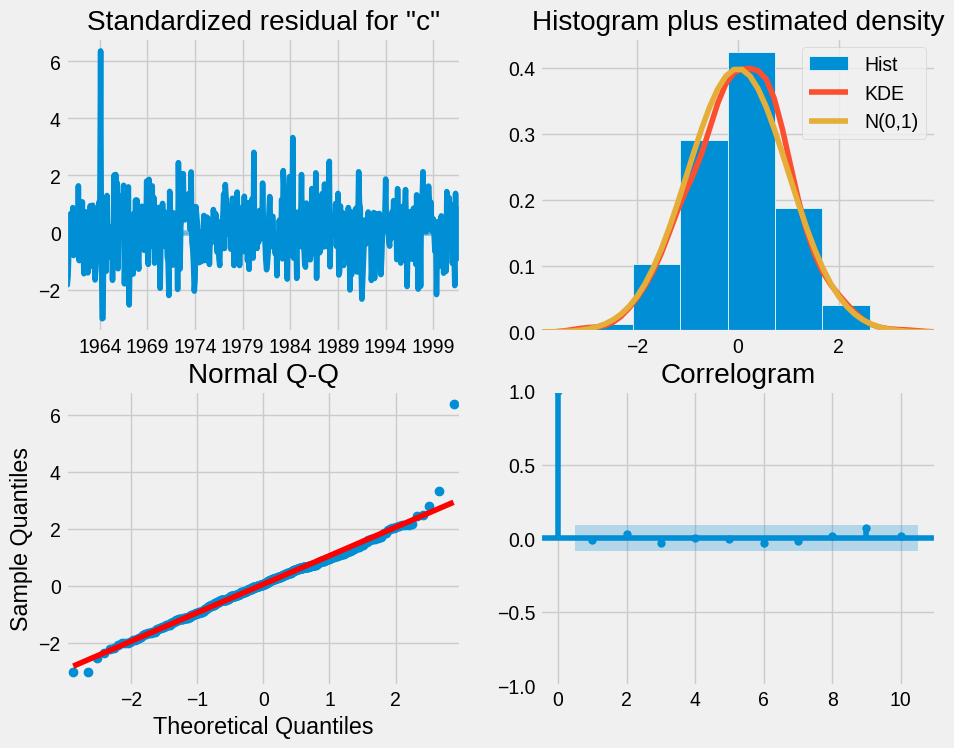

In [9]:
# Plotting to check the data
results.plot_diagnostics(figsize=(10,8))
plt.style.use("seaborn-v0_8-whitegrid")


### Predicting the results with the best parameters.

In [10]:
# Predicting results with the right parameters.
preds = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = preds.conf_int()

### Plottig the details.

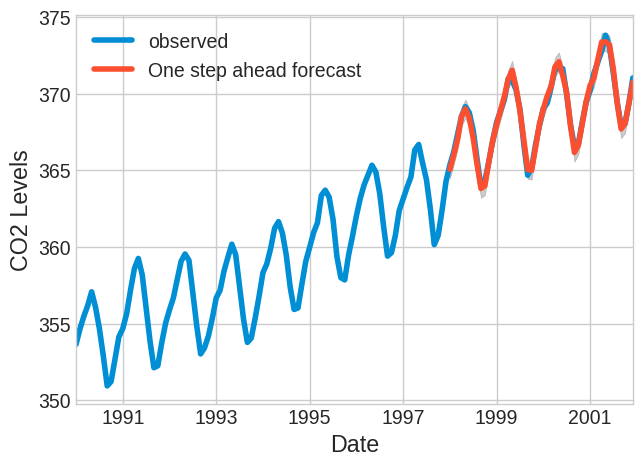

In [11]:
# Plotting the observed results.
ax = y['1990':].plot(label='observed')
preds.predicted_mean.plot(ax=ax, label = 'One step ahead forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)


ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

### Quantifying the results and calculating the MSE.

In [12]:
# Calculating MSE and quantifying the results
y_forecasted = preds.predicted_mean
y_true = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_true) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


### Keeping the dynamic predictions.

In [13]:
# using dynamic forecasts for calculating further predictions based on the results of current predictions.
dyn_pred = results.get_prediction(start=pd.to_datetime('1998-01-01'),dynamic=True, full_results = True)
dyn_pred_ci = dyn_pred.conf_int()

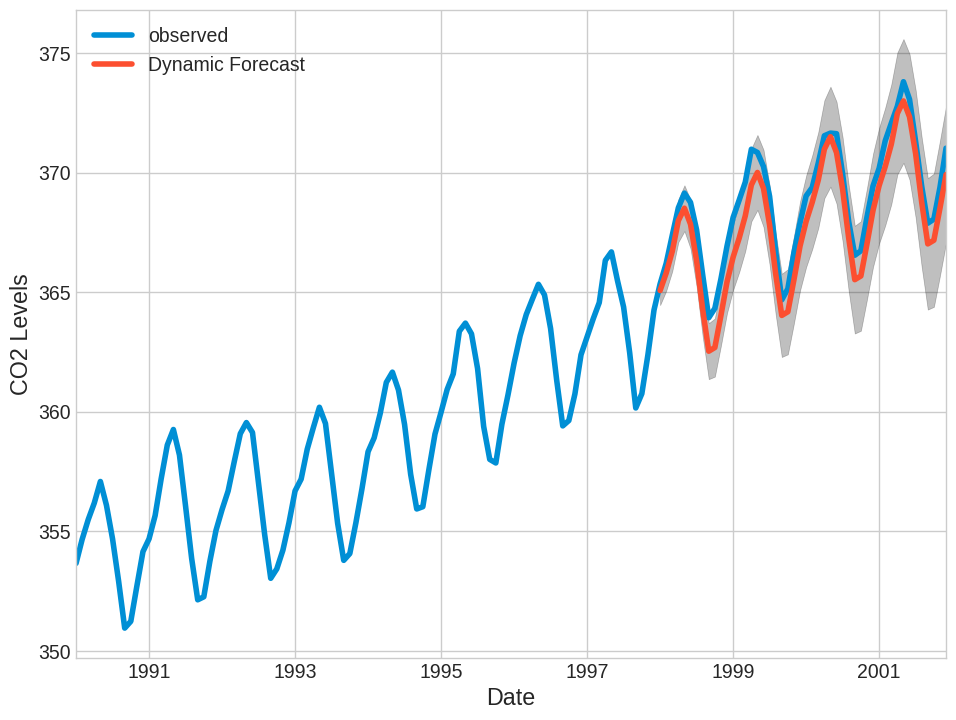

In [16]:
# Plotiing the observed and dynamically forecasted values.
ax = y['1990':].plot(label='observed', figsize=(10, 8))
dyn_pred.predicted_mean.plot(label= 'Dynamic Forecast', ax=ax)

ax.fill_between(dyn_pred_ci.index,
                dyn_pred_ci.iloc[:, 0],
                dyn_pred_ci.iloc[:, 1], color='k', alpha=.25)


ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

### MSE for the dynamic values.

In [17]:
# Extract the predicted and true values of our time sereis.
y_forecasted = dyn_pred.predicted_mean
y_true = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_true) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


### Forecasting for more future values.

In [18]:
# Visualizing the forecasts. Getting forecatsts 500 steps ahead of future.
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

### Plotting the results.

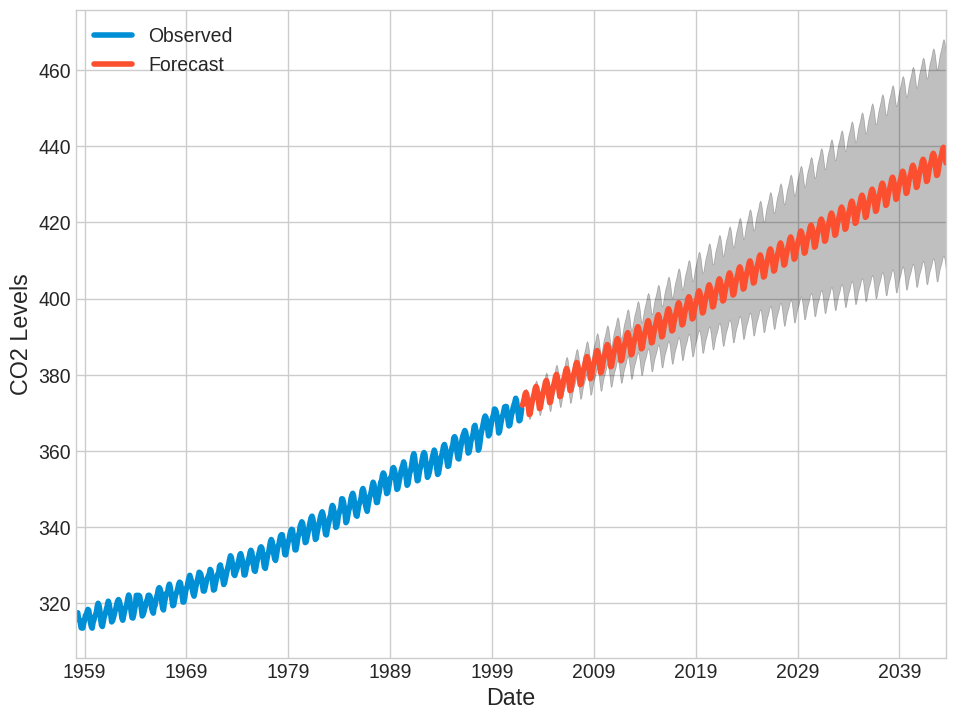

In [20]:
ax = y.plot(label='Observed', figsize=(10, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()